## Problem Statement:

Consider Iris data set available iris.csv. The data set consist of 150 data samples with 5 features. Where,sepal-length, sepal-width, petal-length and petal-width are indicator variables whereas, class is the predictive variable. With this information on the data set, perform following tasks in Python to perform data preprocessing and feature extraction.

1. Plot data distributions of all variables present in the data set in Python. Analyse the distributions.
2. Apply suitable data preprocessing technique to transform the given data set to follow standard normal distribution for all indicator variables present in the data set.
3. What test will you use to find the relational strength between each pair of variable present in the data set? Apply test on the given data set in Python and analyse the results.
4. Apply regression on the given data set to extract top two important features for the class variable present in the data set.

## Content

* [Loading Data And Overview](#data_loading)
* [1. Ploting And Analysing Data Distribution](#data_distribution)
* [2. Data Preprocessing](#data_preprocessing)
* [2.1. Label Encoding of Species](#label_encoding)
* [2.2 Standarization of The Data](#standarization)
* [3 Finding Relational Strength Between Pair of Variables](#relation_strength)
* [3.1 Pearson Correlation](#pearson_correlation)
* [3.2 Chi-Square Features](#chi_square)
* [4. Finding Top Two Important Feature](#important_features)

In [37]:
## Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

<a id='data_loading'></a>
## Data Loading And Overview

In [2]:
iris_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

## Set the column
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print("Total nuber of samples: ", len(iris_data))
print("Unique flower species: ", len(np.unique(iris_data['species'])))

Total nuber of samples:  150
Unique flower species:  3


<a id='data_distribution'></a>
## 1. Ploting  And Analysing Data Distribution

In [4]:
sns.set_style('darkgrid')

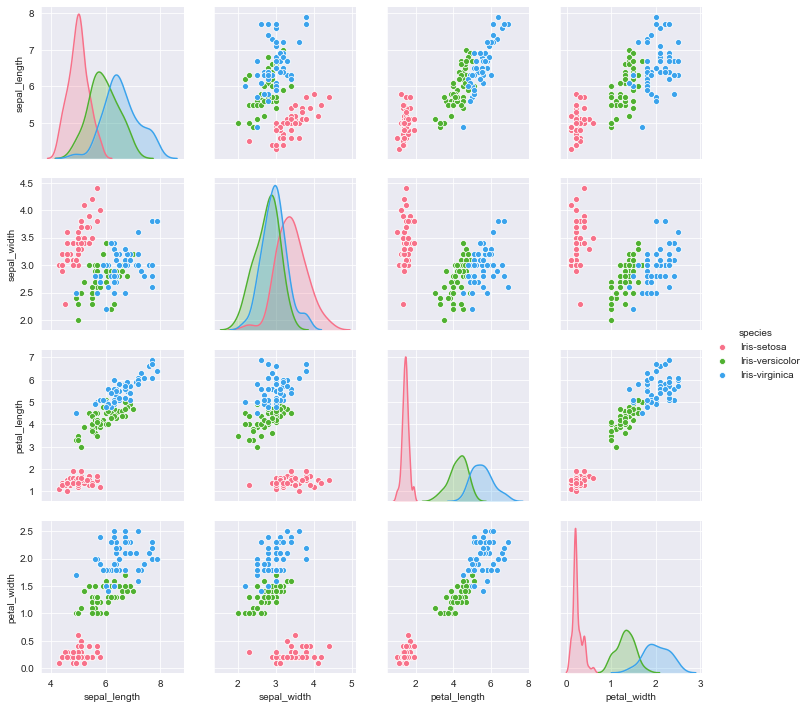

In [7]:
sns.pairplot(iris_data, hue='species', palette='husl')

From the above plot we can see that most of the features are normally distributed. and Petal length  and petal width are the most distinguishable features with respect to their species. 

In [8]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
## Find the correlarion Matrix
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


From the above correlation matrix, we can see that petal length and petal width are highly correlated features. So we can take these two features to predict the class labels.

<a id='data_preprocessing'></a>
## 2. Data Preprocessing

Before going farther we need to change the species colume because many machine learning algorithms works better on quantitative data. So we use label encoding to map the species column with discrete values, then we will apply OVA technique for multi-class classification.

<a id='label_encoding'></a>
### 2.1. Label Encoding of Species

In [10]:
species_le = LabelEncoder()
y = species_le.fit_transform(iris_data['species'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So we got the label encoded data where setosa labeled as 0, versicolor labeled as 1 and virginica labeled as 2

<a id='standarization'></a>
### 2.2. Standarization of The Data

In [38]:
# Select the feature vector
X = iris_data.copy()
del X['species']
stdsc = StandardScaler()
X_Standard = stdsc.fit_transform(X)

<a id='relation_strength'></a>
## 3. Finding Relational Strength Between Pair of Variables

To find the relational strength between features we can use **pearson correlation** or **chi2 Test**. Those can help us to find the important features in the dataset 

<a id='pearson_correlation'></a>
### 3.1. Pearson Correlation

In [39]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [40]:
## Finding the correlation
cor_support, cor_feature = cor_selector(X, y,num_feats=2)
print(str(len(cor_feature)), 'selected features')

2 selected features


<a id='chi_square'></a>
### 3.2. Chi-Square Features

In [41]:
## Need to normanlize the data
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=2)
chi_selector.fit(X_norm, y) ## Chi selector uses normized data
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

2 selected features


<a id='important_features'></a>
## 4. Finding Top Two Important Feature

To find the top two important we can use result of above two test on the dataset

In [43]:
feature_name = list(X.columns)

In [44]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df

,Feature,Pearson,Chi-2,Total
3,petal_width,True,True,2
2,petal_length,True,True,2
1,sepal_width,False,False,0
0,sepal_length,False,False,0


Chi2 and Pearson correlation both selected petal_width and petal_length as the best features for the model